In [1]:
import numpy as np
from ot.greenkhorn.greenkhorn import OT
import matplotlib.pyplot as plt

np.random.seed(0)


def Gaussian_OT(Gaussian_1, Gaussian_2):
    m1, cov1 = Gaussian_1
    m2, cov2 = Gaussian_2
    sqrt_cov1 = np.linalg.cholesky(cov2)
    invsqrt_cov1 = np.linalg.inv(sqrt_cov1)
    cov = invsqrt_cov1 @ np.linalg.cholesky(sqrt_cov1 @ cov2 @ sqrt_cov1.T) @ invsqrt_cov1

    def T(x):
        return m2 + cov @ (x - m1)

    return T


def euclidean_wasserstein(xs, ys, order=2):
    return np.mean(np.linalg.norm(xs - ys, axis=-1, ord=order) ** order) ** (1 / order)


def pdf(x, m, cov):
    return np.exp(-(x - m).T @ np.linalg.inv(cov) @ (x - m) / 2)


n = 5
m1 = np.random.randn(n)
m2 = np.random.randn(n)
cov1 = np.random.randn(n, n)
cov1 = cov1 @ cov1.T
cov1 = np.eye(n)
cov2 = np.random.randn(n, n)
cov2 = cov2 @ cov2.T
cov2 = 2 * np.eye(n)
Gaussian_1 = (m1, cov1)
Gaussian_2 = (m2, cov2)
T = Gaussian_OT(Gaussian_1, Gaussian_2)
N_samples = 1000
samples_1 = np.random.multivariate_normal(m1, cov1, N_samples)
samples_2 = np.random.multivariate_normal(m2, cov2, N_samples)
C = np.array([[np.linalg.norm(sample_1 - sample_2, ord=2) for sample_1 in samples_1] for sample_2 in samples_2])
r = np.vectorize(pdf, signature='(n),(m),(l, r)->()')(samples_1, m1, cov1)
c = np.vectorize(pdf, signature='(n),(m),(l, r)->()')(samples_2, m2, cov2)
r = r / np.sum(r)
c = c / np.sum(c)
eps = 1.0
tp, _, _ = OT(C, r, c, eps)
print(tp)
r = np.array([0.5, 0.5])
c = np.array([0.5, 0.5])
C = np.array([[0., 1.], [1.0, 0.]])
tp, _, _ = OT(C, r, c, 4 * np.log(2))
print(tp)
print(T(samples_1[0]))

[[0.00099379 0.00099379 0.00099379 ... 0.00099379 0.00099379 0.00099379]
 [0.00099379 0.00099379 0.00099379 ... 0.00099379 0.00099379 0.00099379]
 [0.00099379 0.00099379 0.00099379 ... 0.00099379 0.00099379 0.00099379]
 ...
 [0.00099379 0.00099379 0.00099379 ... 0.00099379 0.00099379 0.00099379]
 [0.00099379 0.00099379 0.00099379 ... 0.00099379 0.00099379 0.00099379]
 [0.00099379 0.00099379 0.00099379 ... 0.00099379 0.00099379 0.00099379]]
[[0.36552929 0.13447071]
 [0.13447071 0.36552929]]
[-1.64973833  0.59053526 -0.96450349 -1.82950145  0.58802464]


(array([0.0156151 , 0.06246041, 0.17003112, 0.31230206, 0.36261739,
        0.37302746, 0.27066179, 0.10410069, 0.05378535, 0.01041007]),
 array([-1.07050216, -0.49413708,  0.08222799,  0.65859306,  1.23495814,
         1.81132321,  2.38768829,  2.96405336,  3.54041844,  4.11678351,
         4.69314859]),
 <BarContainer object of 10 artists>)

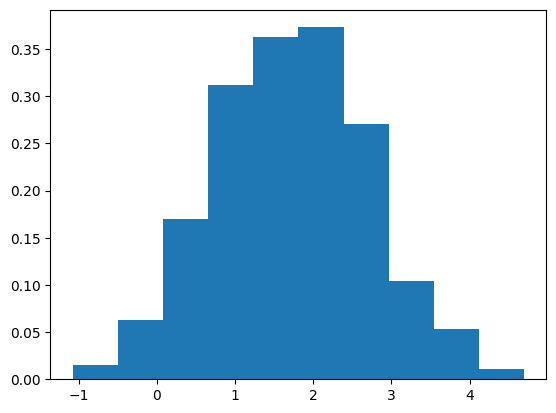

In [2]:
plt.hist(samples_1[:, 0], bins=10, density=True)

In [8]:
samples_1[:, 0]

array([1.0915919 , 1.36227141, 2.49314291, 1.07924226, 0.59890251,
       3.65994152])